
열이 많을수록 계산이 오래걸린다

Wine 예제를 사용한 실제데이터 오차 확인

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [15]:
# 수치미분 함수

def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

# sigmoid 함수

def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [16]:
class Wine:
    
    def __init__(self, name, input_nodes, hidden1_nodes, output_nodes, learning_rate):
        
        self.name = name
        
        # 2층 hidden layer unit 
        # 가중치 W, 바이어스 b 초기화
        self.W2 = np.random.rand(input_nodes, hidden1_nodes)  
        self.b2 = np.random.rand(hidden1_nodes)
        
        # 3층 hidden layer unit  
        self.W3 = np.random.rand(hidden1_nodes, output_nodes)
        self.b3 = np.random.rand(output_nodes)
        
        # 학습률 learning rate 초기화
        self.learning_rate = learning_rate
        
        print(self.name, " is created !!!")
        
    # 손실함수
    def feed_forward(self):
        
        delta = 1e-7    # log 무한대 발산 방지
    
        z2 = np.dot(self.input_data, self.W2) + self.b2
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)
    
        # cross-entropy 
        return  -np.sum( self.target_data*np.log(y + delta) + (1-self.target_data)*np.log((1 - y)+delta ) )
    
    # 손실 값 계산
    def loss_val(self):
        
        delta = 1e-7    # log 무한대 발산 방지
    
        z2 = np.dot(self.input_data, self.W2) + self.b2
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)
            
        # cross-entropy 
        return  -np.sum( self.target_data*np.log(y + delta) + (1-self.target_data)*np.log((1 - y)+delta ) )
    
    # query, 즉 미래 값 예측 함수
    def predict(self, input_data):    
        
        z2 = np.dot(input_data, self.W2) + self.b2
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)
        
        if y >= 0.5:
            result = 1  # True
        else:
            result = 0  # False
    
        return y, result
    
    def accuracy(self, input_data, target_data):
        
        matched_list = []
        not_matched_list = []
        
        for index in range(len(input_data)):
            
            (real_val, logical_val) = self.predict(input_data[index])
            
            if logical_val == target_data[index]:
                matched_list.append(index)
            else:
                not_matched_list.append(index)
                
        accuracy_result = len(matched_list) / len(input_data)
        
        #print("Accuracy => ", accuracy_result)
        
        return not_matched_list, accuracy_result
        
        
    # 수치미분을 이용하여 손실함수가 최소가 될때 까지 학습하는 함수
    def train(self, input_data, target_data):
        
        self.input_data = input_data
        self.target_data = target_data
        
        f = lambda x : self.feed_forward()
        
        self.W2 -= self.learning_rate * numerical_derivative(f, self.W2)
    
        self.b2 -= self.learning_rate * numerical_derivative(f, self.b2)
        
        self.W3 -= self.learning_rate * numerical_derivative(f, self.W3)
    
        self.b3 -= self.learning_rate * numerical_derivative(f, self.b3)

In [17]:
class DataGeneration:
    
    def __init__(self, name, file_path, seperation_rate):
        
        self.name = name
        
        self.file_path = file_path
        
        self.seperation_rate = seperation_rate
        
    # numpy.random.shuffle()  이용하여 training_data / test_data 생성
    def generate(self):
    
        # 데이터 불러오기, 파일이 없는 경우 exception 발생

        try:
            loaded_data = np.loadtxt(self.file_path, delimiter=',', dtype=np.float32)
            
        except Exception as err:
            print('[DataGeneration::generate()]  ', str(err))
            raise Exception(str(err))

        print("[DataGeneration]  loaded_data.shape = ", loaded_data.shape)
        
        
        # 분리비율에 맞게 테스트데이터로 분리
        total_data_num = len(loaded_data)
        test_data_num = int(len(loaded_data) * self.seperation_rate)

        # numpy.random.shuffle 을 이용하여 랜덤하게 데이터 섞기
        np.random.shuffle(loaded_data)
        
        # test_data 는 0 : test_data_num
        
        test_data = loaded_data[ 0:test_data_num ]

        # training_data 는 test_data_num 부터 끝까지 
        training_data = loaded_data[ test_data_num: ]

        
        return training_data, test_data

In [63]:
test_seperation_rate = 0.3

data_obj = DataGeneration('Wine', './(200309)wine.csv', test_seperation_rate)

(training_data, test_data) = data_obj.generate()


print('================================================')
print('training data.shape = ', training_data.shape)
print('test data.shape = ', test_data.shape)

print('================================================')

[DataGeneration]  loaded_data.shape =  (6497, 13)
training data.shape =  (4548, 13)
test data.shape =  (1949, 13)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[0. 1.]
[3433 1115]


In [22]:
i_nodes = training_data.shape[1] - 1    # input nodes 개수
h1_nodes = 10  # hidden 1 nodes 개수. 
o_nodes = 1    # output nodes 개수
lr = 1e-2      # learning rate. hi_node = 2, 1e-1 에서 수렴
epochs = 20   # 반복횟수. 

# 저장 리스트
loss_val_list = []    # loss val list
accuracy_val_list = []    # training data accuracy val
validation_accuracy_val_list = []    # validation data loss val


# Diabetes 객체 생성
obj1 = Wine("Wine", i_nodes, h1_nodes, o_nodes, lr)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs):
    
    for index in range(len(training_data)):
        
        input_data = training_data[index, 0:-1]
        target_data = training_data[index, [-1]]
        
        obj1.train(input_data, target_data)
        
    cur_loss_val = obj1.loss_val()
    
    loss_val_list.append(cur_loss_val)
    
    print('epochs = ', step+1, ', learning rate = ', lr, ', hiddden nodes = ', h1_nodes, ', sepeartion rate = ', test_seperation_rate, ', loss value = ', cur_loss_val)
    

end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

Wine  is created !!!
Neural Network Learning using Numerical Derivative...
epochs =  1 , learning rate =  0.01 , hiddden nodes =  10 , sepeartion rate =  0.3 , loss value =  0.23365822429521005
epochs =  2 , learning rate =  0.01 , hiddden nodes =  10 , sepeartion rate =  0.3 , loss value =  0.23365822429527386
epochs =  3 , learning rate =  0.01 , hiddden nodes =  10 , sepeartion rate =  0.3 , loss value =  0.23365822429518313
epochs =  4 , learning rate =  0.01 , hiddden nodes =  10 , sepeartion rate =  0.3 , loss value =  0.2336582242951558
epochs =  5 , learning rate =  0.01 , hiddden nodes =  10 , sepeartion rate =  0.3 , loss value =  0.23365822429526867
epochs =  6 , learning rate =  0.01 , hiddden nodes =  10 , sepeartion rate =  0.3 , loss value =  0.2336582242951597
epochs =  7 , learning rate =  0.01 , hiddden nodes =  10 , sepeartion rate =  0.3 , loss value =  0.23365822429514357
epochs =  8 , learning rate =  0.01 , hiddden nodes =  10 , sepeartion rate =  0.3 , loss valu

In [23]:
test_input_data = test_data[ :, 0:-1 ]
test_target_data = test_data[ :, -1 ]

(false_list, accuracy_ret) = obj1.accuracy(test_input_data, test_target_data) 

print('Test Data Accuracy = ', np.round(accuracy_ret, 3))

Test Data Accuracy =  0.76


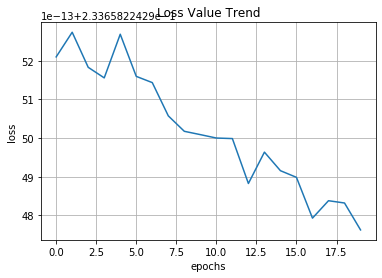

In [24]:
plt.title('Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(loss_val_list)
plt.show()

In [ ]:
그래프가 이렇게 튀는 이유
test data가 정형화(균일) 되지 않음
해결법
튀는데이터를 제거
1. data inspectation(데이터 조사)
2. decision making
제외했을때 오버피팅이 발생하거나 제외해도 상관없다면 그 근거를 찾는것이
회사의 질을 결정한다.
정량적인 평가 지표

In [55]:
A = np.array([5,2,6,2,7,5,6,8,2,9])

unique, counts = np.unique(A, return_counts=True)

print(type(unique), type(counts))
print(unique)
print(counts)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[2 5 6 7 8]
[3 2 2 1 1]
